# 層次聚類（Hierarchical Clustering）

## 1. 介紹  
層次聚類是一種基於距離或相似度來逐步合併或拆分樣本的聚類方法，主要分為兩種方法：  
- **凝聚式（Agglomerative）**：自底向上，將每個資料點視為獨立群，逐步合併成較大的群。  
- **分裂式（Divisive）**：自頂向下，將所有資料視為一個整體，逐步拆分成較小的群。  

---

## 2. 主要步驟（以凝聚式為例）  
1. 將每個數據點視為單獨一群。  
2. 計算群與群之間的距離，根據距離最近的合併群組。  
3. 重複此過程，直到所有數據合併為一個群，或達到指定的群數。  
4. 使用樹狀圖（Dendrogram）來視覺化聚類過程。

---

## 3. 參數選擇  

### (1) 距離度量方式（metric）  
決定如何計算樣本之間的距離，常見選項：  
- `euclidean`（歐幾里得距離）  
- `manhattan`（曼哈頓距離）  
- `cosine`（餘弦相似度）  

### (2) 群與群之間的計算方式（method）  
決定如何計算群之間的距離，常見方法：  
- `"single"`：最短距離法（最近點法）  
- `"complete"`：最長距離法（最遠點法）  
- `"average"`：平均距離法  
- `"weighted"`：加權平均距離法  
- `"centroid"`：重心法  
- `"medion"`：中位數法  
- `"ward"`：最小化群內變異法（常用於最小平方誤差）  

---

## 4. 優缺點  

**優點：**  
- 不需事先指定群數（可透過樹狀圖決定）  
- 適合發現階層結構的數據  
- 適用於小型數據集  

**缺點：**  
- 計算複雜度高，當數據量大時，效率較低  
- 無法回復，合併或拆分後不可更改  

In [54]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [55]:
iris = datasets.load_iris()
X = iris.data
X = X[:,2:4] #為了方便視覺化，因此暫時只取兩個特徵

# Sklearn

**n_clusters**:  
要分成幾群，給定數值  

**metric**:  
距離的計算方式，"euclidean"、"l1"、"l2"、"manhattan"、"cosine"...  

**linkage**:  
群與群之間的距離，"ward"、"complete"、"average"、"single"  



In [56]:
# 建模
from sklearn.cluster import AgglomerativeClustering
ml = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

In [57]:
ml.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

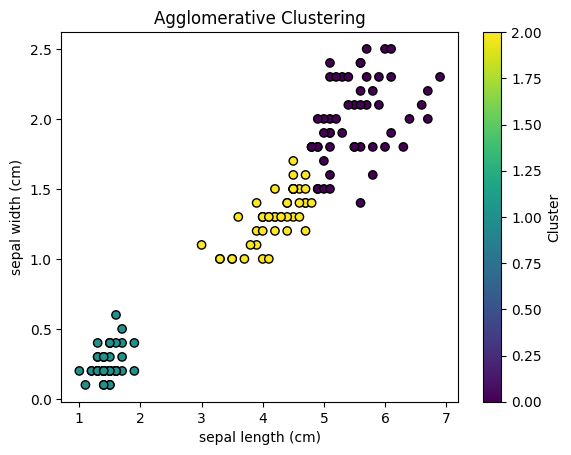

In [58]:
# 執行分群並獲取標籤
labels = ml.fit_predict(X)  

# 繪製散佈圖
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Agglomerative Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Scipy

### metric：距離的計算方式

### method ：群與群之間的計算方式，包含以下選項：
- `"single"`  
- `"complete"`  
- `"average"`  
- `"weighted"`  
- `"centroid"`  
- `"medion"`  
- `"ward"`  

In [59]:
# 匯入 scipy 階層式聚類模組
import scipy.cluster.hierarchy as sch

In [60]:
dis = sch.linkage(X, metric='euclidean', method='ward')

Text(0.5, 1.0, 'Hierarchical')

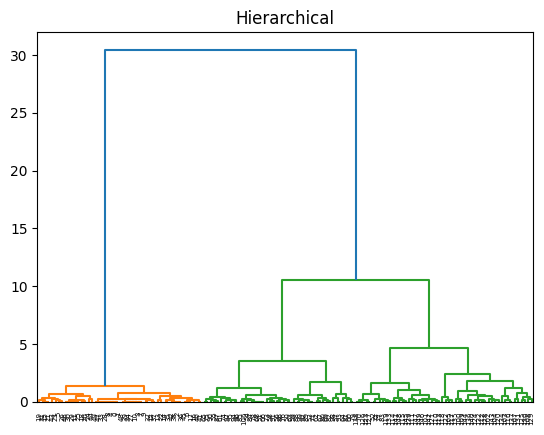

In [61]:
sch.dendrogram(dis)
plt.title('Hierarchical')

### 以距離分群

In [68]:
max_dis=5 #距離等於5（依照上面圖示，應該會分成三群）
clusters=sch.fcluster(dis,max_dis,criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

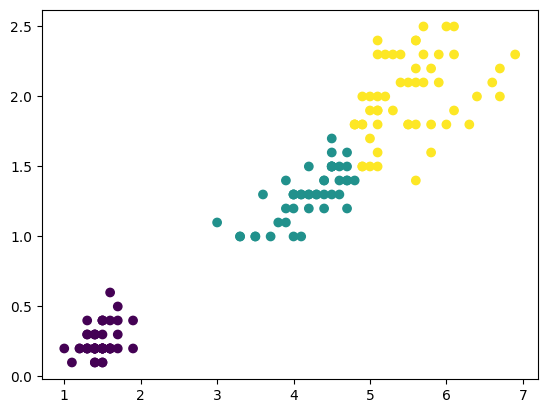

In [69]:
plt.scatter(X[:,0],X[:,1], c=clusters)

### 以群數分群

In [64]:
k=3
clusters=sch.fcluster(dis,k,criterion='maxclust')

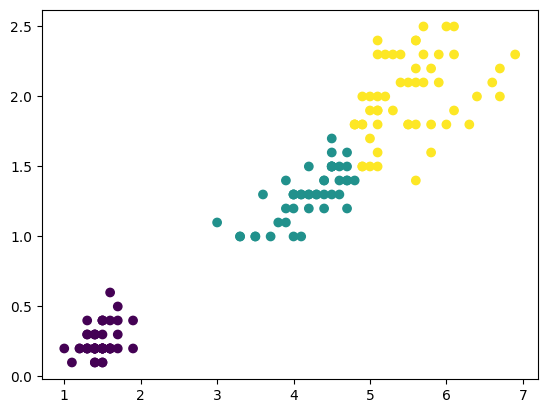

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)